In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,cohen_kappa_score
from sklearn.metrics import  auc,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [5]:
df1 = pd.read_csv("data_2_var_csv")

In [6]:
df1.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


Spliting the dataset into x,y

In [7]:
x1 = df1.iloc[:,:-1]
y1= df1.iloc[:,-1]

# EXPLORATARY DATA ANALYSIS:

Checking missing values.

In [8]:
x1.isnull().sum()

x1    5
x2    3
dtype: int64

In [9]:
y1.isnull().sum()

0

In [10]:
x1

,x1,x2
0,-119.366669,1.150000e+02
1,-101.108045,9.777716e+01
2,-130.278658,1.067677e+02
3,-114.703415,1.011955e+02
4,-119.366669,1.150000e+02
...,...,...
2222,98.714112,8.964312e+01
2223,96.633331,9.100000e+01
2224,85.673940,1.038393e+02
2225,78.958862,7.860537e+01


In [11]:
y1

0       1
1       1
2       1
3       1
4       1
       ..
2222    0
2223    0
2224    0
2225    0
2226    0
Name: y, Length: 2227, dtype: int64

Checking correlation for features.

In [12]:
x1.corr()

,x1,x2
x1,1.000000,0.037288
x2,0.037288,1.000000


In [13]:
corr = x1.corr()

In [14]:
corr

,x1,x2
x1,1.000000,0.037288
x2,0.037288,1.000000


<AxesSubplot:>

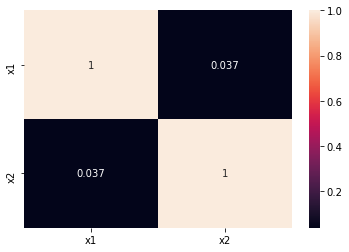

In [15]:
sns.heatmap(x1.corr(),annot=True)

Outlier detecton and treatment

<AxesSubplot:xlabel='x1'>

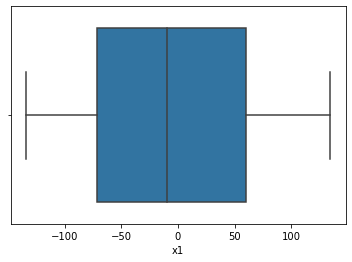

In [16]:
sns.boxplot(x1['x1'])

<AxesSubplot:xlabel='x2'>

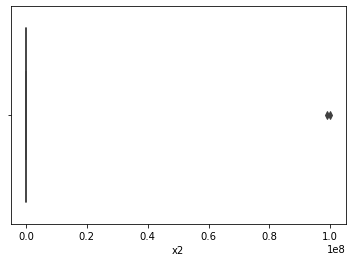

In [17]:
sns.boxplot(x1['x2'])

In [18]:
def outlier(x1):
    a=[]
    empty=[]
    ind=[]
    q1=x1.quantile(0.25)
    q3=x1.quantile(0.75)
    iqr=q3-q1
    inner_fence=q1-(1.5*iqr)
    outer_fence=q3+(1.5*iqr)
    for index,i in enumerate(x1):
        if (i<inner_fence or i>outer_fence):
            a.append(i)
            ind.append(index)
            
    if a==empty:
        print("There is no Outlier")
    else:
        print("The outliers are : \n",a)
        print("The number of outliers : ",len(a),",index= ",ind,"\n")

In [19]:
outlier(x1['x1'])

There is no Outlier


In [20]:
outlier(x1['x2'])

The outliers are : 
 [99009998.0, 99999999.0]
The number of outliers :  2 ,index=  [1541, 2226] 



In [21]:
df_x=x1.drop(index= [1541, 2226])

In [22]:
outlier(df_x['x1'])

There is no Outlier


In [23]:
outlier(df_x['x2'])

There is no Outlier


Visualising features using scatter plot

<AxesSubplot:xlabel='x1', ylabel='x2'>

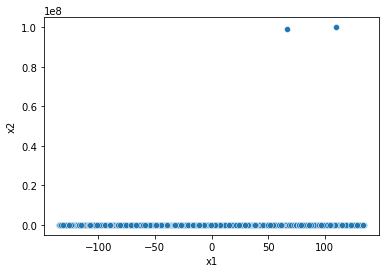

In [24]:
sns.scatterplot(x1['x1'],x1['x2'])

<AxesSubplot:xlabel='x1', ylabel='count'>

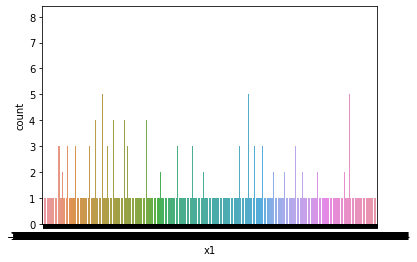

In [25]:
sns.countplot('x1',data=x1)

<AxesSubplot:xlabel='x2', ylabel='count'>

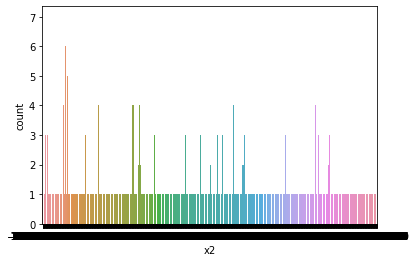

In [26]:
sns.countplot('x2',data=x1)

Missing values are treated in R using predictive mean matching technique with the help of mice imputer.

In [27]:
df = pd.read_csv('C:\\Users\\91979\\Desktop\\pga15\\Dataset\\data1.csv')
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# MODEL BUILDING


    Model Build Classifier     : Logistic Regression
    Independent Variable       : y
    Train-Test split Ratio     : 0.3
    Training set ID            : (1558, 2)
    Testing set ID             : (669, 2)
    Training set D             : (1558,)
    Testing set D              : (669,)
    Summary Report             : 

                  precision    recall  f1-score   support

           0       0.48      0.53      0.50       331
           1       0.49      0.44      0.47       338

    accuracy                           0.49       669
   macro avg       0.49      0.49      0.49       669
weighted avg       0.49      0.49      0.48       669

    Confusion Matrix           : 

    [[175 156]
 [188 150]]
    cohen's kappa              : -0.027484596839003617
    Cross Validation Accuracy  : 0.4865136476426799
    
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.468


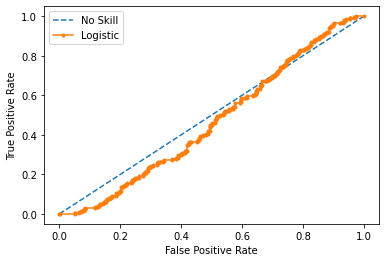

In [28]:
def model_LR():
    clf = LogisticRegression(solver='sag',max_iter=1000)
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
    clf.fit(xtrain,ytrain)
    pred = clf.predict(xtest)
    cv_clf = cross_val_score(clf,xtrain,ytrain,cv=10)
    
    print(f'''
    Model Build Classifier     : Logistic Regression
    Independent Variable       : {df.iloc[:,-1].name}
    Train-Test split Ratio     : 0.3
    Training set ID            : {xtrain.shape}
    Testing set ID             : {xtest.shape}
    Training set D             : {ytrain.shape}
    Testing set D              : {ytest.shape}
    Summary Report             : \n
    {classification_report(pred,ytest)}
    Confusion Matrix           : \n
    {confusion_matrix(pred,ytest)}
    cohen's kappa              : {cohen_kappa_score(pred,ytest)}
    Cross Validation Accuracy  : {cv_clf.mean()}
    ''')
    ns_probs = [0 for _ in range(len(ytest))]
    clf_probs = clf.predict_proba(xtest)
    clf_probs = clf_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(ytest, ns_probs)
    clf_auc = roc_auc_score(ytest, clf_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (clf_auc))
    ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
    clf_fpr, clf_tpr, _ = roc_curve(ytest, clf_probs)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(clf_fpr, clf_tpr, marker='.', label='Logistic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
model_LR()


    Model Build Classifier     : KNN
    Independent Variable       : y
    Train-Test split Ratio     : 0.3
    Training set ID            : (1558, 2)
    Testing set ID             : (669, 2)
    Training set D             : (1558,)
    Testing set D              : (669,)
    Summary Report             : 

                  precision    recall  f1-score   support

           0       0.97      0.97      0.97       362
           1       0.96      0.96      0.96       307

    accuracy                           0.97       669
   macro avg       0.97      0.97      0.97       669
weighted avg       0.97      0.97      0.97       669

    Confusion Matrix           : 

    [[351  11]
 [ 12 295]]
    cohen's kappa              : 0.9307556263584938
    Cross Validation Accuracy  : 0.9357899090157155
    
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.987


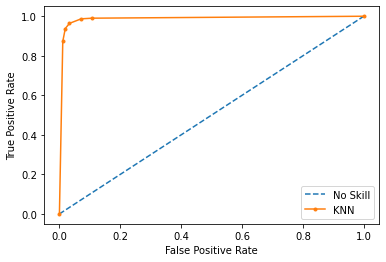

In [29]:
def model_KNN():
    clf = KNeighborsClassifier()
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
    clf.fit(xtrain,ytrain)
    pred = clf.predict(xtest)
    cv_clf = cross_val_score(clf,xtrain,ytrain,cv=10)
    
    print(f'''
    Model Build Classifier     : KNN
    Independent Variable       : {df.iloc[:,-1].name}
    Train-Test split Ratio     : 0.3
    Training set ID            : {xtrain.shape}
    Testing set ID             : {xtest.shape}
    Training set D             : {ytrain.shape}
    Testing set D              : {ytest.shape}
    Summary Report             : \n
    {classification_report(pred,ytest)}
    Confusion Matrix           : \n
    {confusion_matrix(pred,ytest)}
    cohen's kappa              : {cohen_kappa_score(pred,ytest)}
    Cross Validation Accuracy  : {cv_clf.mean()}
    ''')
    ns_probs = [0 for _ in range(len(ytest))]
    clf_probs = clf.predict_proba(xtest)
    clf_probs = clf_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(ytest, ns_probs)
    clf_auc = roc_auc_score(ytest, clf_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (clf_auc))
    ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
    clf_fpr, clf_tpr, _ = roc_curve(ytest, clf_probs)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(clf_fpr, clf_tpr, marker='.', label='KNN')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
model_KNN()


    Model Build Classifier     : SVM
    Independent Variable       : y
    Train-Test split Ratio     : 0.3
    Training set ID            : (1558, 2)
    Testing set ID             : (669, 2)
    Training set D             : (1558,)
    Testing set D              : (669,)
    Summary Report             : 

                  precision    recall  f1-score   support

           0       1.00      0.54      0.70       669
           1       0.00      0.00      0.00         0

    accuracy                           0.54       669
   macro avg       0.50      0.27      0.35       669
weighted avg       1.00      0.54      0.70       669

    Confusion Matrix           : 

    [[363 306]
 [  0   0]]
    cohen's kappa              : 0.0
    Cross Validation Accuracy  : 0.5641852770885029
    
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.571


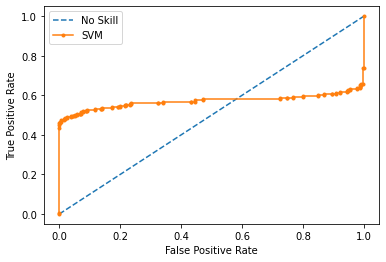

In [30]:
def model_SVM():
    clf = SVC(probability=True)
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
    clf.fit(xtrain,ytrain)
    pred = clf.predict(xtest)
    cv_clf = cross_val_score(clf,xtrain,ytrain,cv=10)
    
    print(f'''
    Model Build Classifier     : SVM
    Independent Variable       : {df.iloc[:,-1].name}
    Train-Test split Ratio     : 0.3
    Training set ID            : {xtrain.shape}
    Testing set ID             : {xtest.shape}
    Training set D             : {ytrain.shape}
    Testing set D              : {ytest.shape}
    Summary Report             : \n
    {classification_report(pred,ytest)}
    Confusion Matrix           : \n
    {confusion_matrix(pred,ytest)}
    cohen's kappa              : {cohen_kappa_score(pred,ytest)}
    Cross Validation Accuracy  : {cv_clf.mean()}
    ''')
    ns_probs = [0 for _ in range(len(ytest))]
    clf_probs = clf.predict_proba(xtest)
    clf_probs = clf_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(ytest, ns_probs)
    clf_auc = roc_auc_score(ytest, clf_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (clf_auc))
    ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
    clf_fpr, clf_tpr, _ = roc_curve(ytest, clf_probs)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(clf_fpr, clf_tpr, marker='.', label='SVM')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
model_SVM()


    Model Build Classifier     : Decision Tree
    Independent Variable       : y
    Train-Test split Ratio     : 0.3
    Training set ID            : (1558, 2)
    Testing set ID             : (669, 2)
    Training set D             : (1558,)
    Testing set D              : (669,)
    Summary Report             : 

                  precision    recall  f1-score   support

           0       0.94      0.96      0.95       356
           1       0.96      0.94      0.95       313

    accuracy                           0.95       669
   macro avg       0.95      0.95      0.95       669
weighted avg       0.95      0.95      0.95       669

    Confusion Matrix           : 

    [[343  13]
 [ 20 293]]
    cohen's kappa              : 0.9008020489317248
    Cross Validation Accuracy  : 0.931306865177833
    
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.951


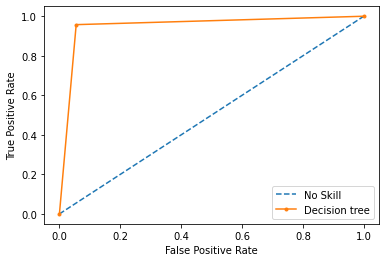

In [31]:
def model_DT():
    clf = DecisionTreeClassifier()
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
    clf.fit(xtrain,ytrain)
    pred = clf.predict(xtest)
    cv_clf = cross_val_score(clf,xtrain,ytrain,cv=10)
    
    print(f'''
    Model Build Classifier     : Decision Tree
    Independent Variable       : {df.iloc[:,-1].name}
    Train-Test split Ratio     : 0.3
    Training set ID            : {xtrain.shape}
    Testing set ID             : {xtest.shape}
    Training set D             : {ytrain.shape}
    Testing set D              : {ytest.shape}
    Summary Report             : \n
    {classification_report(pred,ytest)}
    Confusion Matrix           : \n
    {confusion_matrix(pred,ytest)}
    cohen's kappa              : {cohen_kappa_score(pred,ytest)}
    Cross Validation Accuracy  : {cv_clf.mean()}
    ''')
    ns_probs = [0 for _ in range(len(ytest))]
    clf_probs = clf.predict_proba(xtest)
    clf_probs = clf_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(ytest, ns_probs)
    clf_auc = roc_auc_score(ytest, clf_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (clf_auc))
    ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
    clf_fpr, clf_tpr, _ = roc_curve(ytest, clf_probs)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(clf_fpr, clf_tpr, marker='.', label='Decision tree')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
model_DT()

Out of all the machine learning model KNN and Decision tree performs better